# Plotting code for the value of the option as a function of the stopping price

We load in the data created by the cpp script, and plot this.

Currently the cpp creatres two files, for different values of beta

In [2]:
import csv

S = []
V1 = []
V2 = []
V_sigma_5= []
V_sigma_10= []
V_sigma_15= []
V_sigma_20= []
V_sigma_25= []
with open('V_function_S.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        S.append(float(row[0]))
        V1.append(float(row[1]))
        V2.append(float(row[2]))
        
with open('V_function_sigma.txt') as csv_file1:
    csv_reader = csv.reader(csv_file1, delimiter=',')
    for row in csv_reader:
        V_sigma_5.append(float(row[1]))
        V_sigma_10.append(float(row[2]))
        V_sigma_15.append(float(row[3]))
        V_sigma_20.append(float(row[4]))
        V_sigma_25.append(float(row[5]))



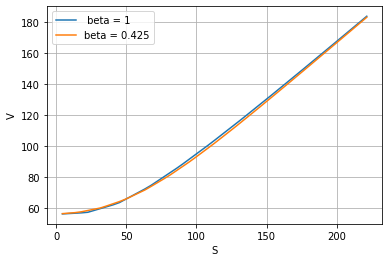

In [4]:
import numpy as np
import matplotlib.pyplot as plt
Bond_floor = np.ones(len(S)) * 56
Equity_part = []

#COUPON = C* (1- np.exp((-(alpha+r)*T)))/(alpha+r) 

#BOND = F*np.exp(-r*T)


#for i in range(len(S)):
    #Equity_part.append(max(S[i], COUPON+BOND))
plt.plot(S,V1, label = " beta = 1")
plt.plot(S,V2, label = "beta = 0.425")
#plt.plot(S,Equity_part)
plt.xlabel("S")
plt.ylabel('V')
plt.legend()
plt.grid()
plt.show()

Not sure whether this even makes sense, its a european call option so intital price should be lower then slowly increase? Unless high price at small S is due to getting the principle F?

At large S, both bonds should become similar, as they essentially only become dependent on RS, as this becomes increasingly likely to be the payout I believe.

# Effect of increasing s_max

Text(0, 0.5, 'V(S0,0)')

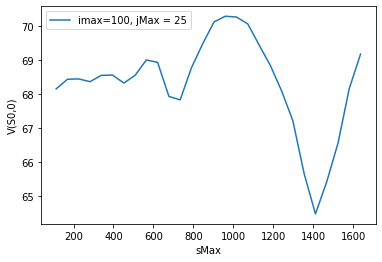

In [23]:
s_max = []
Value_sMax = []

with open('V_function_SMax.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        s_max.append(float(row[0]))
        Value_sMax.append(float(row[1]))


plt.plot(s_max, Value_sMax, label = "imax=100, jMax = 25")

plt.legend()
plt.xlabel("sMax")
plt.ylabel("V(S0,0)")

# Effect of increasing imax

imax is the number of timesteps in the program. In the following code block we extract data from the cpp file and look at how increasing imax changes the value of the converible bond.

We expect to see the value decreasing slightly as we increase iMax, as the stock time is modelled mor continuously? not 100 sure

Text(0, 0.5, 'V(S0,0)')

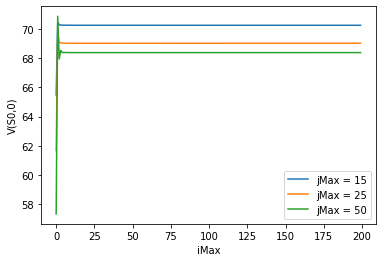

In [19]:
imax = []
Value_iMax_j1 = []
Value_iMax_j2 = []
Value_iMax_j3 = []

with open('V_function_iMax.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        imax.append(float(row[0]))
        Value_iMax_j1.append(float(row[1]))
        Value_iMax_j2.append(float(row[2]))
        Value_iMax_j3.append(float(row[3]))

plt.plot(imax, Value_iMax_j1, label = "jMax = 15")
plt.plot(imax, Value_iMax_j2, label = "jMax = 25")
plt.plot(imax, Value_iMax_j3, label = "jMax = 50")
plt.legend()
plt.xlabel("iMax")
plt.ylabel("V(S0,0)")

Text(0, 0.5, 'V(S0,0)')

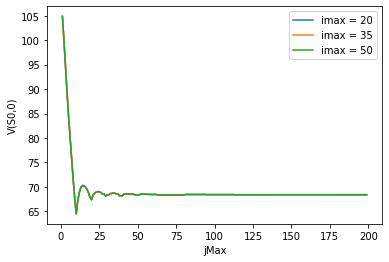

In [20]:
jmax = []
Value_jMax_i1 = []
Value_jMax_i2 = []
Value_jMax_i3 = []
with open('V_function_jMax.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        jmax.append(float(row[0]))
        Value_jMax_i1.append(float(row[1]))
        Value_jMax_i2.append(float(row[2]))
        Value_jMax_i3.append(float(row[3]))

plt.plot(jmax, Value_jMax_i1, label = "imax = 20")
plt.plot(jmax, Value_jMax_i2, label = "imax = 35")
plt.plot(jmax, Value_jMax_i3, label = "imax = 50")
plt.legend()
plt.xlabel("jMax")
plt.ylabel("V(S0,0)")

# Checking the running of code, comparing to analytical solution

Assuming beta = 1, and kappa = 0, we are in a normal black scholes atmosphere.

We can then look at the converible bond as equal to a bond combined with a long call option on the underlying shares. The strike K of the call option is equal to F/R. We also need to take into account the sum of the coupon payments, and the discount rate of these payments.

The price $P$ is given by

$P = COUPON + F exp(-rT) + RP_{call}$

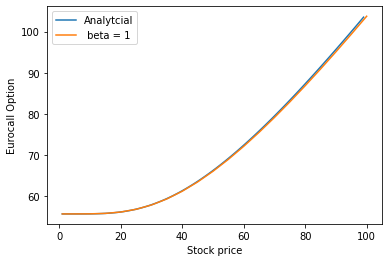

In [255]:
import scipy.stats as si
C = 0.106
alpha = 0.01
r = 0.0038
T = 3
F = 56
R = 1
sigma = 0.369
#WHY HAS HE ADDED .47 to X?
K = 56.47
S0 = K
#Calulate value of coupon
#Through integrating Cexp(-(alpha+r)t)dt from 0 to T
COUPON = C* (1- np.exp((-(alpha+r)*T)))/(alpha+r) 

BOND = F*np.exp(-r*T)

def euro_vanilla_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    #d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

ANALYTIC_PRICE = []
STOCK_PRICE = []
BOND_FLOOR = []
EQUITY = []
stock_a = []
value_ana_code = []
for s in range(1,300):
    STOCK_PRICE.append(s)
    EQUITY.append(max(BOND+COUPON, s))
    BOND_FLOOR.append(BOND+COUPON)
    ANALYTIC_PRICE.append(euro_vanilla_call(s, K = 56.47, T =3, r = 0.0038, sigma = 0.369)+ BOND +COUPON)
    
with open('analytical.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        stock_a.append(float(row[0]))
        value_ana_code.append(float(row[1]))


plt.plot(STOCK_PRICE,ANALYTIC_PRICE, label = "Analytcial")
plt.plot(stock_a,value_ana_code, label = " beta = 1")
plt.xlabel('Stock price')
plt.ylabel('Eurocall Option')
plt.legend()


In [256]:
euro_vanilla_call(50, K = 56.47, T =3, r = 0.0038, sigma = 3.73)+ BOND +COUPON

105.61139938988237

# Beta : Elasticity of Variance

https://onlinelibrary-wiley-com.manchester.idm.oclc.org/doi/pdf/10.1002/9781118862650
Page 169

A beta < 1 means that the asset price has a variance which increases as S decreases. This models the fact that the volatility of a share tends t oincrease as price moves down.

The CIR model corresponds to beta = 0.5, whilst geometric brownian motion matrialises when beta = 1.

CIR model (Cox - Ingersoll-Ross) model incorporates a mean-reversion property into the stock price.